### Boston -Housing Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

- Boston is house data preloaded in sklearn

In [5]:
house=load_boston()

In [7]:
print(house.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
house.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [20]:
fdf=pd.DataFrame(house.data,columns=house.feature_names)

In [21]:
fdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
tdf=pd.DataFrame(house.target,columns=['MedValue'])

In [23]:
df=pd.concat([fdf,tdf],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedValue
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [26]:
len(df)

506

In [27]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MedValue    0
dtype: int64

- Missing Attribute Values: None

<AxesSubplot:>

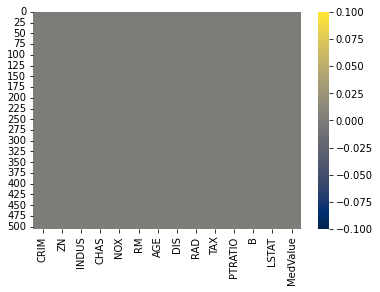

In [32]:
sns.heatmap(df.isnull(),cmap="cividis")

<AxesSubplot:xlabel='MedValue', ylabel='Density'>

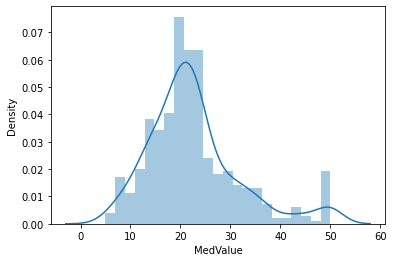

In [34]:
sns.distplot(df["MedValue"])

- Setting Independent and Dependents variables

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    float64
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    float64
 9   TAX       506 non-null    float64
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MedValue  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [40]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MedValue'],
      dtype='object')

In [41]:
x=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y=df['MedValue']

In [42]:
x.shape,y.shape

((506, 13), (506,))

### Train and Test Data

In [43]:
from sklearn.model_selection import train_test_split

In [60]:
len(x_train)/len(x)

0.7490118577075099

In [61]:
len(x_test)/len(x)

0.2509881422924901

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [53]:
lr=LinearRegression()

In [64]:
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [66]:
pd.DataFrame(lr.coef_,index=x.columns,columns=['Mycoef'])

,Mycoef
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


In [65]:
lr.intercept_

36.45948838509044

In [54]:
lr.fit(x,y)

LinearRegression()

In [55]:
prd=lr.predict(x_test)

In [56]:
prd

array([29.07194308, 36.10639164, 13.75908538, 24.55744957, 18.58215236,
       22.94545403, 17.61572573, 13.57141932, 22.97718032, 20.46870847,
       24.91525464, 18.92026211, -4.28131071, 21.26198266, 19.45123791,
       25.57824627, 20.56099819,  6.4519857 , 40.84555721, 17.5183465 ,
       27.20340972, 30.35192656, 11.45511759, 23.53334055, 18.12427476,
       16.39147632, 22.42817373, 15.28000133, 22.39251096, 19.10854144,
       22.97657219, 24.88682244, 25.30713064, 18.22846804, 16.94776851,
       17.28601894, 30.56759672, 20.16097176, 23.49428992, 24.04295712,
       14.01320787, 32.70905124, 43.18949844, 17.42153786, 27.1190194 ,
       17.21225183, 14.28275814, 25.20148859, 20.16719441, 30.00384338,
       21.58679568, 34.33123186, 15.83288129, 25.59413475, 39.31792393,
       22.22225914, 18.740485  , 33.43563311, 24.78456674, 13.39891261,
       22.55408869, 31.15264947, 31.23411512, 16.17801106, 20.54605423,
       17.00587718, 20.30445783, 26.03576297, 31.35762569, 12.68

In [67]:
lr.predict([[3,4,5,3,45,67,8,57,8,9,54,32,34]])

array([-650.50895509])

In [58]:
mean_absolute_error(y_test,prd)

2.8354931320816403

In [62]:
mean_squared_error(y_test,prd)

19.52441663266857

In [63]:
r2_score(y_test,prd)

0.7211878763889406